# Project 3 - Data Exploration with Python

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import collections
import datetime as dt
import numpy as np
import pandas_profiling
import glob
import os

## Requirement 3 - Combine the data files in one dataframe

In [2]:
path = r'C:\Users\fredr\OneDrive\Documentos\Data Science\Yasser\Project3\Yasser_update_clean_ver_3\Ford_Bike_Data'
all_files = glob.glob(os.path.join(path, "*.csv"))

dfs = (pd.read_csv(f) for f in all_files)
df = pd.concat(dfs, ignore_index = True)

df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916465 entries, 0 to 1916464
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             1916465 non-null  int64  
 1   start_time               1916465 non-null  object 
 2   end_time                 1916465 non-null  object 
 3   start_station_id         1906726 non-null  float64
 4   start_station_name       1906726 non-null  object 
 5   start_station_latitude   1916465 non-null  float64
 6   start_station_longitude  1916465 non-null  float64
 7   end_station_id           1906726 non-null  float64
 8   end_station_name         1906726 non-null  object 
 9   end_station_latitude     1916465 non-null  float64
 10  end_station_longitude    1916465 non-null  float64
 11  bike_id                  1916465 non-null  int64  
 12  user_type                1916465 non-null  object 
 13  member_birth_year        1757969 non-null 

The bike_share_for_all_trip column is only introduced in the post-2017 data sets and this will be adjusted appropriataely in the following section.

## Requirement 4 - Apply data wrangling and cleaning to the data frame

We can see above that there are a number of columns that need to be cleaned. Some columns are stored as a less useful type (start_time, end_time, user_type, member_gender, bike_share_for_all_trip) and some columns (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender) are missing values and these need to be examined. 

## 4.1 Converting to datetimes

In [3]:
# Begin by examining the date columns in an attempt to convert them to datetimes
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN


In [4]:
# They are already in ISO 8601 format so should be able to convert easily

for column in ['start_time', 'end_time']:
    df[column] = pd.to_datetime(df[column])
    
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916465 entries, 0 to 1916464
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1916465 non-null  int64         
 1   start_time               1916465 non-null  datetime64[ns]
 2   end_time                 1916465 non-null  datetime64[ns]
 3   start_station_id         1906726 non-null  float64       
 4   start_station_name       1906726 non-null  object        
 5   start_station_latitude   1916465 non-null  float64       
 6   start_station_longitude  1916465 non-null  float64       
 7   end_station_id           1906726 non-null  float64       
 8   end_station_name         1906726 non-null  object        
 9   end_station_latitude     1916465 non-null  float64       
 10  end_station_longitude    1916465 non-null  float64       
 11  bike_id                  1916465 non-null  int64         
 12  

This shows that they have successfully been converted to datetimes and we can check that they are correct by looking at the head of the data frame again.

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,NaN
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,NaN
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,NaN


This shows that the values are as expected which means that we can move on.

## 4.2 Exploring missing station ids

We saw above that a number of instances are missing data about their start and end stations. We will try to work out the cause of this absence of data below and take action accordingly.

In [6]:
df[['start_station_id', 'end_station_id']].copy().profile_report()

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From this report we can see that the number of stations that occur in the data set (324 distinct ids and Nan) is smaller than the highest id for the stations (374) so it seems as though there are quite a few ids for which there seem to be no corrseponding stations. 

We can also gather lots of useful information here on the most common routes (looking at duplicate rows) and the most and least popular start and end stations (toggling details for those variables respectively). These insights may come in handy later on but for now we are just trying to establish what to do about missing values. 

Let us see if there are any stations that are only start stations or only end stations.

In [7]:
# Examine station_ids to see if some ids seem to be missing
start_stations = df['start_station_id']
end_stations = df['end_station_id']

# retaining unique start and end stations as a set will make finding complements easier
uniq_start_stations = set(start_stations.unique())
uniq_end_stations = set(end_stations.unique())

start_end_stations_difference = uniq_start_stations - uniq_end_stations
print('These are the starting stations that are not in the end stations: {}'.format(start_end_stations_difference))

end_start_stations_difference = uniq_end_stations - uniq_start_stations
print('These are the ending stations that are not in the starting stations: {}'.format(start_end_stations_difference))


These are the starting stations that are not in the end stations: {nan}
These are the ending stations that are not in the starting stations: {nan}


Exactly the same stations occur in both the list of starting stations and ending stations so it is not the case that some stations are only used for rental and others for return. The simplest explanation is that some ids do not correspond to any station that has ever been used.

Now let us check if there are any rides that have a start station id but no end station id.

In [8]:
# find the number of missing values in these columns for each row
missing_ids = df['start_station_id'].isna().astype(int) + df['start_station_id'].isna().astype(int)

# find the frequency of each number of missing ids
missing_ids.value_counts()

0    1906726
2       9739
Name: start_station_id, dtype: int64

Ok so there are no cases where one id is missing and the other is present. This suggests that these are unlikley to be down to any error and might be systematic. 

Let's look at how the cases of missing ids look over time. 

(array([17683., 17697., 17713., 17727., 17744., 17758., 17775., 17789.,
        17805.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

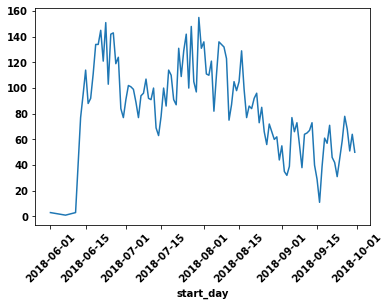

In [9]:
# create a data frame for rows that have no station ids
no_start_station = df[df['start_station_id'].isna()].copy()

# add a column for start_day to make the graphing of the number of missing station_ids over time easier
no_start_station['start_day']  = no_start_station['start_time'].dt.date
no_start_station.groupby('start_day').size().plot()

plt.xticks(rotation = 45)

This shows that there is no particular pattern in the number of records with no start station over time. 
Research from here: 
https://www.sfmta.com/getting-around/bike/bike-share
The above article suggests that in Jan 2018 the first stationless bikes were introduced. This would fit with the values that are being seen here but would not explain why so few days have records where the start_station_is is missing. 


In [10]:
print('Number of days on which ride began with no start startion id: {}'.format((len(no_start_station['start_day'].unique()))))
print('Earliest case of no station id: {}'.format(min(no_start_station['start_time'])))
print('Latest case of no station id: {}'.format(max(no_start_station['start_time'])))

timediff = pd.to_datetime(max(df['start_time'])) - pd.to_datetime(min(no_start_station['start_day'].unique()))
print('The difference in time between first case and latest case: {}'.format(timediff))

Number of days on which ride began with no start startion id: 113
Earliest case of no station id: 2018-06-01 13:47:53.131000
Latest case of no station id: 2018-09-30 22:09:18.266000
The difference in time between first case and latest case: 121 days 23:59:12.294000


We can judge from the above that once stationless bikes were introduced they were used most days (113 out of the 121 possible days) however it is difficult to judge how popular they were without first putting into context how many stationless bikes there actually were. We will do this after we have added a column for 'stationless' as this will make the process significantly easier.  

At this point it would be nice to be able to generate a separate data frame which stores information on our stations separately fron the information on rides. This will be quite useful in our situation to analyse the stations quickly without having to work with the entire data frame. It would be even more useful if stationless bikes did not exist as it would allow us to remove columns from df that only relate to station info and then to only use this information when we need it. Thus speeding up analysis of the df in general.


Nevertheless we will still pull out the remaining information relating to stations into a distinct table. This will make for a more streamlined data frame for us to analyse.

In [11]:
# create a new data frame with the information for all stations
start_stations_df = df[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']].copy()
start_stations_df = start_stations_df.rename(columns={"start_station_id": "id", "start_station_name": "name",'start_station_latitude' : 'lat', 'start_station_longitude' : 'long'})

# we will drop any rows that are missing station_ids as these will note provide us with useful information here
start_stations_df = start_stations_df.dropna()
start_stations_df['id'] = start_stations_df['id'].astype(int)
start_stations_df = start_stations_df.drop_duplicates()
start_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 1778401
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      342 non-null    int32  
 1   name    342 non-null    object 
 2   lat     342 non-null    float64
 3   long    342 non-null    float64
dtypes: float64(2), int32(1), object(1)
memory usage: 12.0+ KB


Interestingly we have more rows in the table above (342) than we would expect (325) based on the results above.

In [12]:
print('Number of station names: {}'.format(len(start_stations_df['name'].unique())))
print('Number of station longditudes: {}'.format(len(start_stations_df['long'].unique())))
print('Number of station latitudes: {}'.format(len(start_stations_df['lat'].unique())))

Number of station names: 339
Number of station longditudes: 335
Number of station latitudes: 335


The results above show that the reason for more unique rows than station_ids is that there are more names, longditudes and latitudes than there are ids. 
To explore this we will look at cases of ids that occur more than once in this data frame.

In [13]:
# add a column to tell us how often each id occurs in the data frame
# we could use any column where 'name' is used, we just need to find the size of the group that each row is in
start_stations_df['id_freq'] = start_stations_df.groupby('id')['name'].transform(len)
start_stations_df = start_stations_df.sort_values(by=['id'])

# reduce the data frame to just those ids that occur on multiple occassions. 
changing_stations = start_stations_df[start_stations_df['id_freq'] > 1]
changing_stations

,id,name,lat,long,id_freq
832633,50,2nd St at Townsend St,37.780526,-122.390288,2
138974,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,2
1351,101,San Bruno Ave at 16th St,37.766008,-122.405677,2
1538774,101,Potrero Ave at 15th St (Temporary Location),37.766629,-122.407706,2
1143520,173,Shattuck Ave at 55th St,37.840364,-122.264488,2
543,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,2
1113,192,37th St at West St,37.826696,-122.271795,2
1538163,192,MLK Jr Way at 36th St (Temporary Location),37.825794,-122.269399,2
1730426,205,Miles Ave at Cavour St,37.838800,-122.258732,3
1315,205,Shafter Ave at Cavour St,37.837947,-122.257243,3


We can see from the above table that a lot of the cases where there is more than 1 station per id can be explained by temporary stations or very slight changes in location of the station. 

At this point my instinct is to combine these into a single value for id, long and lat for each station. This would sacrifice information that could be used to conduct an analysis of the effect of temporary stations on bike usage but this is not one of my aims. 

Before combining the data for each station id I will first check how far the maximum change in location is for a single station. If there is a significant change in a stations location then I will not combine the information. 

In [14]:
display(max(changing_stations.groupby('id')['lat'].transform(lambda x: (max(x) - min(x)))))
display(max(changing_stations.groupby('id')['long'].transform(lambda x: (max(x) - min(x)))))

0.0028717796724606615

0.0023963338928183475

The changes here are minimal so I am going to combine all stations with the same id into one station, taking the most common location as the one for which details will be saved. This is fine as this is an analysis of existing data. If I were setting this up with the expectation of adding more data in the future then I would consider using the most recently used location.

For each id I will choose the name, lat and long that occur most frequently for that id.

In [15]:
stations_df = start_stations_df.copy()
stations_df['common_name'] = stations_df.groupby('id')['name'].transform(lambda x: x.value_counts().index[0])
stations_df['common_lat'] = stations_df.groupby('id')['lat'].transform(lambda x: x.value_counts().index[0])
stations_df['common_long'] = stations_df.groupby('id')['long'].transform(lambda x: x.value_counts().index[0])

stations_df = stations_df.drop(['name', 'lat', 'long', 'id_freq'], axis = 1)
stations_df = stations_df.drop_duplicates()
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 179 to 1778401
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           324 non-null    int32  
 1   common_name  324 non-null    object 
 2   common_lat   324 non-null    float64
 3   common_long  324 non-null    float64
dtypes: float64(2), int32(1), object(1)
memory usage: 11.4+ KB


This has now left us with a simplified set of information for each station.

#### 4.2 Conclusion

The fact that some records are missing station_ids prevents us from being able to remove the station_name, lat and long columns from the data frame without losing a lot of information about the locations of stationless bikes.  
Keeping it in there unnecessarily does slow down all operations though.
I will add a column for stationless bike_status and fill in station_ids for stationless bikes with 0 and convert ids to ints.

In [16]:
df['stationless'] = df['start_station_id'].isna().astype(int)
df['start_station_id'] = df['start_station_id'].fillna(0)
df['start_station_id'] = df['start_station_id'].astype(int)
df['start_station_name'] = df['start_station_name'].fillna('stationless')

df['end_station_id'] = df['end_station_id'].fillna(0)
df['end_station_id'] = df['end_station_id'].astype(int)
df['end_station_name'] = df['end_station_name'].fillna('stationless')

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916465 entries, 0 to 1916464
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1916465 non-null  int64         
 1   start_time               1916465 non-null  datetime64[ns]
 2   end_time                 1916465 non-null  datetime64[ns]
 3   start_station_id         1916465 non-null  int32         
 4   start_station_name       1916465 non-null  object        
 5   start_station_latitude   1916465 non-null  float64       
 6   start_station_longitude  1916465 non-null  float64       
 7   end_station_id           1916465 non-null  int32         
 8   end_station_name         1916465 non-null  object        
 9   end_station_latitude     1916465 non-null  float64       
 10  end_station_longitude    1916465 non-null  float64       
 11  bike_id                  1916465 non-null  int64         
 12  

The code below would create separate the rides data frame into two, one data frame with stationless rides and another with rides between stations.

In [17]:
# stationless_records = df[df['stationless'] == 1].copy()

# rides_from_stations = df[df['stationless'] == 0].copy()

# cols_to_drop = ['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name', 'end_station_latitude', 'end_station_longitude']
# rides_from_station = rides_from_stations.drop(cols_to_drop, axis = 1)

We can also now more easily look at how many bikes are actually used as stationless bikes.

In [18]:
df.groupby('bike_id')['stationless'].mean().sort_values(ascending = False).value_counts()

0    4186
1     199
Name: stationless, dtype: int64

This tells us that there are 199 different stationless bikes over the course of the data. It also tells us that no bikes are used for both stationless rides and station rides. It is difficult to put this 199 into context and it would require further analysis to establish how popular these bikes are. We shall not do this analysis here. 

## 4.3 User type

User type is likely a column that can be turned into a categorical type in order to save space storing it and make its ues easier.

In [19]:
user_types = df['user_type'].unique()
display(user_types)

array(['Customer', 'Subscriber'], dtype=object)

Every record is classified as either a customer or a subscriber. 
Thus user_type should be represented as a categorical variable.

In [20]:
df['user_type'] = df['user_type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916465 entries, 0 to 1916464
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         int32         
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           int32         
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            object        
 15  bike_share_for_all_trip  object        
 16  stationless              int32         
dtypes: category(1), datetime64[

I will briefly examine the two different categories hoping to find a connection between them and the missing values in member_birth_year and member_gender that would help explain the missing values.

In [21]:
customer_index = df['user_type'] == 'Customer'
customer_df = df[customer_index].copy()
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332075 entries, 0 to 1916464
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             332075 non-null  int64         
 1   start_time               332075 non-null  datetime64[ns]
 2   end_time                 332075 non-null  datetime64[ns]
 3   start_station_id         332075 non-null  int32         
 4   start_station_name       332075 non-null  object        
 5   start_station_latitude   332075 non-null  float64       
 6   start_station_longitude  332075 non-null  float64       
 7   end_station_id           332075 non-null  int32         
 8   end_station_name         332075 non-null  object        
 9   end_station_latitude     332075 non-null  float64       
 10  end_station_longitude    332075 non-null  float64       
 11  bike_id                  332075 non-null  int64         
 12  user_type      

In [22]:
subscriber_df = df[df['user_type'] == 'Subscriber'].copy()
subscriber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584390 entries, 4 to 1916461
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1584390 non-null  int64         
 1   start_time               1584390 non-null  datetime64[ns]
 2   end_time                 1584390 non-null  datetime64[ns]
 3   start_station_id         1584390 non-null  int32         
 4   start_station_name       1584390 non-null  object        
 5   start_station_latitude   1584390 non-null  float64       
 6   start_station_longitude  1584390 non-null  float64       
 7   end_station_id           1584390 non-null  int32         
 8   end_station_name         1584390 non-null  object        
 9   end_station_latitude     1584390 non-null  float64       
 10  end_station_longitude    1584390 non-null  float64       
 11  bike_id                  1584390 non-null  int64         
 12  

There are records with missing data for birth_year and gender in both dataframes. This tells us that it is not just customer records with data missing. Nevertheless the proportion of subscribers who have their birth_year and gender recorded is a lot higher than the proportion of customers. 

## 4.4 Member Birth Year and Gender

Both of these columns are missing values and it is worth trying to explore why before choosing what to do with those missing pieces of data.

In [23]:
no_birth_year_index = df['member_birth_year'].isna()
no_birth_year = df[no_birth_year_index]
no_birth_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158496 entries, 2 to 1916445
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             158496 non-null  int64         
 1   start_time               158496 non-null  datetime64[ns]
 2   end_time                 158496 non-null  datetime64[ns]
 3   start_station_id         158496 non-null  int32         
 4   start_station_name       158496 non-null  object        
 5   start_station_latitude   158496 non-null  float64       
 6   start_station_longitude  158496 non-null  float64       
 7   end_station_id           158496 non-null  int32         
 8   end_station_name         158496 non-null  object        
 9   end_station_latitude     158496 non-null  float64       
 10  end_station_longitude    158496 non-null  float64       
 11  bike_id                  158496 non-null  int64         
 12  user_type      

In most cases where the birth year is missing, the gender is also missing, however there are a small number of cases where gender data is present and birth_year data is not. 

In [24]:
no_gender_index = df['member_gender'].isna()
no_gender = df[no_gender_index]
no_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158080 entries, 2 to 1916445
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             158080 non-null  int64         
 1   start_time               158080 non-null  datetime64[ns]
 2   end_time                 158080 non-null  datetime64[ns]
 3   start_station_id         158080 non-null  int32         
 4   start_station_name       158080 non-null  object        
 5   start_station_latitude   158080 non-null  float64       
 6   start_station_longitude  158080 non-null  float64       
 7   end_station_id           158080 non-null  int32         
 8   end_station_name         158080 non-null  object        
 9   end_station_latitude     158080 non-null  float64       
 10  end_station_longitude    158080 non-null  float64       
 11  bike_id                  158080 non-null  int64         
 12  user_type      

In all of the cases where gender is missing we are also missing birth_year information.
Perhaps this is down to some users not specifying birth_year. 

I will analyse the usage of the bikes by these users to see if this is down to a small number of users who are repeatedly using the bikes or if there are a larger number of users who are specifying gender but not birth year.

In [25]:
no_birth_year_with_gender = no_birth_year[no_birth_year['member_gender'].notna()]
print('These are the stations that are used by the users in question: \n{}'.format(no_birth_year_with_gender['start_station_id'].value_counts() / len(no_birth_year_with_gender)))

print('\n These are the stations that are used by users in general: \n{}'.format(df['start_station_id'].value_counts() / len(df)))

These are the stations that are used by the users in question: 
22     0.403846
93     0.346154
104    0.146635
23     0.048077
15     0.016827
17     0.016827
16     0.012019
24     0.002404
81     0.002404
215    0.002404
321    0.002404
Name: start_station_id, dtype: float64

 These are the stations that are used by users in general: 
15     0.023442
6      0.020679
30     0.020602
67     0.020357
58     0.019517
         ...   
374    0.000013
358    0.000011
359    0.000009
360    0.000007
361    0.000007
Name: start_station_id, Length: 325, dtype: float64


This shows that a number of stations are regularly used by customers with gender but no birth_year and that these stations are not those regularly used by most users.

To find out exaclty what proportion of total user rides come from these stations we can search for the stations that we are interested in. 

In [26]:
(df['start_station_id'].value_counts() / len(df)).loc[[22, 93, 104]]

22     0.015771
93     0.008629
104    0.002341
Name: start_station_id, dtype: float64

Thus we can see that the overwhelming majority of rides with users who have gender data but not birth_year data took place from 3 locations that are not particularly popular with most riders whose details are not stored. 
The simplest conclusion from this is that there are a few riders whose birth year is not specified but whose gender is. 

We can try to pin down futher how many users this is by checking the number of rides completed by users with gender data but no birth_year data.

In [27]:
# have to make a copy of the view in order to add new columns
no_birth_year_with_gender = no_birth_year_with_gender.copy()
no_birth_year_with_gender['start_day'] = no_birth_year_with_gender['start_time'].dt.date

print('The number of days for which each number of rides occured:')
display(no_birth_year_with_gender.groupby('start_day').size().value_counts())


print('Earliest use day: {}'.format(min(no_birth_year_with_gender['start_day'])))
print('Latest use day: {}'.format(max(no_birth_year_with_gender['start_day'])))

daysdiff = max(no_birth_year_with_gender['start_day']) - min(no_birth_year_with_gender['start_day'])
      
print('Time between these dates: {}'.format(daysdiff))

The number of days for which each number of rides occured:


2    199
1     10
4      2
dtype: int64

Earliest use day: 2017-10-13
Latest use day: 2018-09-28
Time between these dates: 350 days, 0:00:00


These numbers would suggest probably 1 or 2 members have not specified year of birth and have been using the bikes fairly regularly (211 days out of 350) since joining. 

Before finishing this section it is worth checking if the number of records for which we have no data has been changing much over time. 

(array([17348., 17410., 17471., 17532., 17591., 17652., 17713., 17775.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

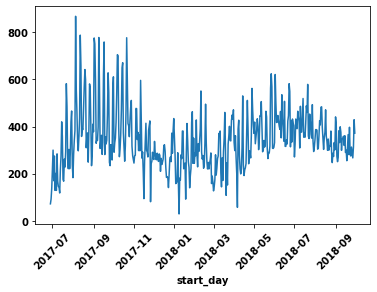

In [28]:
no_birth_year_df = no_birth_year.copy()
no_birth_year_df['start_day'] = no_birth_year_df['start_time'].dt.date

no_birth_year_df.groupby('start_day').size().plot()

plt.xticks(rotation = 45)

### 4.4 Conclusion

There are a number of records for which no data on birth_year and gender is available (158080 out of 1916465 total rides).
These records occur throughout the dataset from the first day until the last. 

For any analyses that relate to age of the user we will remove those records where the age is unknown but for now we will leave all records in the table as the data is useful.

Worth adding an 'unknown' value to gender though and making this a categorical column.

In [29]:
df['member_gender'] = df['member_gender'].fillna('Unknown')
df['member_gender'] = df['member_gender'].astype('category')

## 4.5 Bikeshare

As noted when looking at the original csv files from which the data was loaded, bike_share_for_all_trip is a column that is present in the 2018 data but not in the 2017 data. We can confirm this by looking at the first where the value in that column is not na.

In [30]:
# create bs abbreviation to prevent repeated typing
bs = 'bike_share_for_all_trip'

# create a data frame for rides where the value in bs column is not null
not_bs_na = df[df[bs].notna()].copy()

print('The earliest ride for which bikeshare status is known was at: {}'.format(min(not_bs_na['start_time'])))



The earliest ride for which bikeshare status is known was at: 2018-01-01 00:01:53.847000


Bs is a feature that is included in our 2018 data but not our 2017 data.
Clearly bs is a categorical column and so it will be changed to one.
I will add the value 'Pre-2018' to the column for those values that come before data was recorded. 

In [31]:
df[bs] = df[bs].fillna('Pre-2018')
df[bs] = df[bs].astype('category')

Research from here: https://mtc.ca.gov/sites/default/files/Bikeshare_in_2018_MTC[1].pdf

This suggests that bs indicates the status of the user.
bs status means that the user is part of a wider community of bike users. 

Therefore we will leave the column in as it could prove useful in considering the different habits of bs users in comparison to other users. 

## Exporting df

In [32]:
df.to_csv(r'cleaner_df.csv', index = False)

stations_df.to_csv(r'stations_df.csv', index = False)

Let's take a look at the data as it stands at the end of this process.

In [33]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,stationless
count,1.916465e+06,1.916465e+06,1.916465e+06,1.916465e+06,1.916465e+06,1.916465e+06,1.916465e+06,1.916465e+06,1.757969e+06,1.916465e+06
mean,9.412173e+02,1.104383e+02,3.776831e+01,-1.223532e+02,1.085777e+02,3.776845e+01,-1.223527e+02,2.073052e+03,1.982196e+03,5.081752e-03
std,2.800558e+03,9.542306e+01,1.005044e-01,1.609312e-01,9.523236e+01,1.004009e-01,1.605616e-01,1.179333e+03,1.053493e+01,7.110507e-02
min,6.100000e+01,0.000000e+00,3.726331e+01,-1.224737e+02,0.000000e+00,3.726331e+01,-1.224737e+02,1.000000e+01,1.881000e+03,0.000000e+00
25%,3.600000e+02,2.900000e+01,3.777166e+01,-1.224114e+02,2.700000e+01,3.777176e+01,-1.224094e+02,1.079000e+03,1.977000e+03,0.000000e+00
50%,5.690000e+02,8.100000e+01,3.778165e+01,-1.223974e+02,7.900000e+01,3.778175e+01,-1.223974e+02,2.116000e+03,1.985000e+03,0.000000e+00
75%,8.960000e+02,1.760000e+02,3.779539e+01,-1.222948e+02,1.760000e+02,3.779539e+01,-1.222948e+02,3.020000e+03,1.990000e+03,0.000000e+00
max,8.636900e+04,3.740000e+02,4.551000e+01,-7.357000e+01,3.740000e+02,4.551000e+01,-7.357000e+01,4.466000e+03,2.000000e+03,1.000000e+00


In [34]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916465 entries, 0 to 1916464
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1916465 non-null  int64         
 1   start_time               1916465 non-null  datetime64[ns]
 2   end_time                 1916465 non-null  datetime64[ns]
 3   start_station_id         1916465 non-null  int32         
 4   start_station_name       1916465 non-null  object        
 5   start_station_latitude   1916465 non-null  float64       
 6   start_station_longitude  1916465 non-null  float64       
 7   end_station_id           1916465 non-null  int32         
 8   end_station_name         1916465 non-null  object        
 9   end_station_latitude     1916465 non-null  float64       
 10  end_station_longitude    1916465 non-null  float64       
 11  bike_id                  1916465 non-null  int64         
 12  

In [35]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,stationless
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,Pre-2018,0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,Pre-2018,0
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,Unknown,Pre-2018,0
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,Unknown,Pre-2018,0
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,Pre-2018,0
